<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/neralnetwork/neralnetwork%E4%BB%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 



In [147]:
#シグモイド関数（出力層）
def sigmoid(x):
  return 1/(1+np.exp(-x))

#ReLU関数（隠れ層）
def relu(x):
  return np.maximum(0,x)

In [148]:
#交差エントロピー誤差

def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  
  batch_size = y.shape[0]#yの行数
  return np.sum(-t*np.log(y)-(1-t)*np.log(1-y))/batch_size


  
  

In [149]:
"""
重み、バイアス、初期設定
W1：隠れ層の重み
B1:隠れ層のバイアス
W2:出力層の重み
B2:隠れ層のバイアス
"""


W1 = np.random.rand(2,12)
B1 = np.random.rand(12)
W2 = np.random.rand(12,1)
B2 = np.random.rand(1)
#print(W1)

In [150]:
#活性化関数の微分(relu)u:隠れ層の活性

def relu_diff(u):
  d = np.zeros_like(u) #xと同じ形状の配列を作成
  for i in range(len(u)):
    for j in range(len(u[0])):
      if u[i][j]>0:
        d[i][j] = 1
      else: 
        d[i][j] = 0

  return d

"""
def relu_diff(u):
  d = np.where( x > 0, 1, 0)
  return y
"""

'\ndef relu_diff(u):\n  d = np.where( x > 0, 1, 0)\n  return y\n'

In [151]:
#隠れ層の誤差
"""
delta:一個前の誤差（出力層の誤差）
w:一個前の重み（出力層の重み）
activ:活性化関数の微分
"""
def hidden_delta(delta,w,activ):
  d = np.zeros((4,12)) #データ数×隠れ層のニューロン数の配列を作成
  #d = np.zeros((int(delta),int(w[0])))
  for i in range(len(delta)):
    for j in range(len(w[0])):
      d[i][j] = delta[i]*w[j]*activ[i][j]
  return np.array(d)
  

In [152]:
"""
i = 0
y = np.zeros(300)

N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
for i in range(300):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  #print("Z1")
  #print(Z1)
  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  
  #print(y)

  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  #print(Z2)
  #print("delta")
  #print(delta)
  Z1_t = np.transpose(Z1)
  #print(Z1_t)
  sum_delta = np.dot(Z1_t,delta)
  #print("sum_delta")
  #print(sum_delta)
  
  #print("delta_out")
  #delta_out　なんか違う
  delta_out =(1/N)*sum_delta
  #print("delta_out")
  #print(delta_out)
  
  #print("W2")
  #print(W2)
 
  W2 = W2 - learning_rate*delta_out
  #print("W2")
  #print(W2)


  ##バイアス
  a = np.array([1,1,1,1])
  sum_delta_bias = np.dot(a,delta)
  delta_out_bias = 1/N*sum_delta_bias
  #print(delta_out_bias)
  #print(B2)
  B2 = B2 - learning_rate*delta_out_bias
  #print("B2")
  #print(B2)

  ###隠れ層の逆伝搬
  ##重み
  differential_y = relu_diff(Z1)#活性化関数の微分
  #print(differential_y)
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = 1/N*np.dot(x_t,hid_delta)
  W1 = W1 - learning_rate*delta_hidden
  #print("W1")
  #print(W1)

  ##バイアス
  a2 = np.array([1,1,1,1])
  delta_hidden_bias = 1/N*np.dot(a2,hid_delta)
  #print(B1)
  B1 = B1 - learning_rate*delta_hidden_bias
  #print("B1")
  #print(B1)
"""

'\ni = 0\ny = np.zeros(300)\n\nN = 4#データ数(ミニバッチ)\nlearning_rate = 0.2#学習率\nfor i in range(300):\n  \n  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力\n  target =  np.array([[0],[1],[1],[0]]) #教師\n  \n\n  A1 = np.dot(x,W1)+B1\n  Z1 = relu(A1)#一層目活性化関数かける\n  A2 = np.dot(Z1,W2) + B2\n  Z2 = sigmoid(A2)\n  #print("Z1")\n  #print(Z1)\n  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数\n  \n  #print(y)\n\n  ###出力層の逆伝搬\n  ##重み\n  delta = Z2 - target#誤差\n  #print(Z2)\n  #print("delta")\n  #print(delta)\n  Z1_t = np.transpose(Z1)\n  #print(Z1_t)\n  sum_delta = np.dot(Z1_t,delta)\n  #print("sum_delta")\n  #print(sum_delta)\n  \n  #print("delta_out")\n  #delta_out\u3000なんか違う\n  delta_out =(1/N)*sum_delta\n  #print("delta_out")\n  #print(delta_out)\n  \n  #print("W2")\n  #print(W2)\n \n  W2 = W2 - learning_rate*delta_out\n  #print("W2")\n  #print(W2)\n\n\n  ##バイアス\n  a = np.array([1,1,1,1])\n  sum_delta_bias = np.dot(a,delta)\n  delta_out_bias = 1/N*sum_delta_bias\n  #print(delta_out_bias)\n  #print(B2)

In [153]:
"""
i = 0
y = np.zeros(100)


N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
pram_b1 = 0.9
pram_b2 = 0.999
epsiron = 0.00000001
alfa = 0.0001
m = 0
v = 0
for i in range(100):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  #print("Z1")
  #print(Z1)
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  #print("Z2")
  #print(Z2)
  #print("target")
  #print(target)
  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  
  #print(y)

  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  #print(Z2)
  #print("delta")
  #print(delta)
  Z1_t = np.transpose(Z1)
  #print(Z1_t)
  sum_delta = np.dot(Z1_t,delta)
  #print("sum_delta")
  #print(sum_delta)
  
  #print("delta_out")
  #delta_out　なんか違う
  delta_out =(1/N)*sum_delta
  #print("delta_out")
  #print(delta_out)
  
  print("W2")
  print(W2)
 
  m = pram_b1*m + (1-pram_b2)*(delta_out + alfa*W2)
  v = pram_b2*v + (1-pram_b2)*(delta_out + alfa*W2)**2
  m = m/(1-pram_b1**(i+1))
  v = v/(1-pram_b2**(i+1))
  W2 = W2 - learning_rate*m/(np.sqrt(v)+epsiron)
  print("W2")
  print(W2)


  ##バイアス
  a = np.array([1,1,1,1])
  sum_delta_bias = np.dot(a,delta)
  delta_out_bias = 1/N*sum_delta_bias
  #print(delta_out_bias)
  #print(B2)
  B2 = B2 - learning_rate*delta_out_bias
  #print("B2")
  #print(B2)

  ###隠れ層の逆伝搬
  ##重み
  differential_y = relu_diff(Z1)#活性化関数の微分
  print(differential_y)
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = 1/N*np.dot(x_t,hid_delta)
  W1 = W1 - learning_rate*delta_hidden
  #print("W1")
  #print(W1)

  ##バイアス
  a2 = np.array([1,1,1,1])
  delta_hidden_bias = 1/N*np.dot(a2,hid_delta)
  #print(B1)
  B1 = B1 - learning_rate*delta_hidden_bias
  #print("B1")
  #print(B1)
"""

'\ni = 0\ny = np.zeros(100)\n\n\nN = 4#データ数(ミニバッチ)\nlearning_rate = 0.2#学習率\npram_b1 = 0.9\npram_b2 = 0.999\nepsiron = 0.00000001\nalfa = 0.0001\nm = 0\nv = 0\nfor i in range(100):\n  \n  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力\n  target =  np.array([[0],[1],[1],[0]]) #教師\n  \n\n  A1 = np.dot(x,W1)+B1\n  Z1 = relu(A1)#一層目活性化関数かける\n  #print("Z1")\n  #print(Z1)\n  A2 = np.dot(Z1,W2) + B2\n  Z2 = sigmoid(A2)\n  #print("Z2")\n  #print(Z2)\n  #print("target")\n  #print(target)\n  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数\n  \n  #print(y)\n\n  ###出力層の逆伝搬\n  ##重み\n  delta = Z2 - target#誤差\n  #print(Z2)\n  #print("delta")\n  #print(delta)\n  Z1_t = np.transpose(Z1)\n  #print(Z1_t)\n  sum_delta = np.dot(Z1_t,delta)\n  #print("sum_delta")\n  #print(sum_delta)\n  \n  #print("delta_out")\n  #delta_out\u3000なんか違う\n  delta_out =(1/N)*sum_delta\n  #print("delta_out")\n  #print(delta_out)\n  \n  print("W2")\n  print(W2)\n \n  m = pram_b1*m + (1-pram_b2)*(delta_out + alfa*W2)\n  v = pram_b2*v +

In [154]:

i = 0
y = np.zeros(100)
count = 0

N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
beta1 = 0.9
beta2 = 0.999
epsiron = 0.00000001
alfa = 0.0001
m = 0
v = 0
for i in range(100):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  #print("Z1")
  #print(Z1)
  #print("B2")
  #print(B2)
 
  
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  #print("Z2")
  #print(Z2)
  #print("target")
  #print(target)
  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  
  #print(y)

  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  #print(Z2)
  #print("delta")
  #print(delta)
  Z1_t = np.transpose(Z1)
  #print(Z1_t)
  sum_delta = np.dot(Z1_t,delta)
  #print("sum_delta")
  #print(sum_delta)
  
  #print("delta_out")
  #delta_out　なんか違う
  #delta_out =(1/N)*sum_delta
  #print("delta_out")
  #print(delta_out)
  
  #print("W2")
  #print(W2)
  beta1coef = (1-beta1)/N
  beta2coef = (1-beta2)/N/N
  m = beta1*m + beta1coef*(sum_delta + alfa*W2*N)
  v = beta2*v + beta2coef*(sum_delta + alfa*W2)*(sum_delta+alfa+W2)
  m = beta1*m+beta1coef*sum_delta
  v = beta2*v+beta2coef*sum_delta*sum_delta
  epoch = count/(2*N+1)  
  sqbeta = np.sqrt((1-beta2**(epoch+1)))
  learning_rate2 = learning_rate/(1-beta1**(epoch+1))*sqbeta
  epsilon2 = sqbeta * epsiron

  W2 = W2 - learning_rate2*m/(np.sqrt(v)+epsilon2)

  #print("m")
  #print(m)


  ##バイアス

  #print(delta_out_bias)
  #print(B2)
  
  B2 = B2 - learning_rate2*m[0]/(np.sqrt(v[0])+epsilon2)
  
  ###隠れ層の逆伝搬
  ##重み
  differential_y = relu_diff(Z1)#活性化関数の微分
  print("Z1")
  print(Z1)
  print("differential_y")  
  print(differential_y)
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = 1/N*np.dot(x_t,hid_delta)
  W1 = W1 - learning_rate*delta_hidden
  #print("W1")
  #print(W1)

  ##バイアス
  a2 = np.array([1,1,1,1])
  delta_hidden_bias = 1/N*np.dot(a2,hid_delta)
  #print(B1)
  B1 = B1 - learning_rate*delta_hidden_bias
  #print("B1")
  #print(B1)
  count = count +1

Z1
[[0.34482813 0.90701638 0.22831841 0.47545241 0.75970978 0.68063688
  0.02939832 0.68922141 0.76600803 0.00674765 0.62639333 0.31159763]
 [0.48136223 1.73486475 0.28444688 0.77359163 1.10385337 1.1012511
  0.39923888 0.9814039  1.54607216 0.74460586 1.51188776 0.75671968]
 [0.42937898 1.70044767 0.31527222 0.82526317 0.97038942 1.03792366
  0.4264585  0.96098521 1.71083741 0.92075716 1.15400607 0.66727011]
 [0.56591308 2.52829604 0.37140069 1.12340239 1.31453301 1.45853787
  0.79629906 1.2531677  2.49090153 1.65861537 2.0395005  1.11239216]]
differential_y
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Z1
[[0.33230948 0.90701638 0.22831841 0.47545241 0.75970978 0.68063688
  0.02939832 0.68922141 0.76600803 0.00674765 0.62639333 0.31159763]
 [0.46245947 1.73486475 0.28444688 0.77359163 1.10385337 1.1012511
  0.39923888 0.9814039  1.54607216 0.74460586 1.51188776 0.75671968]
 

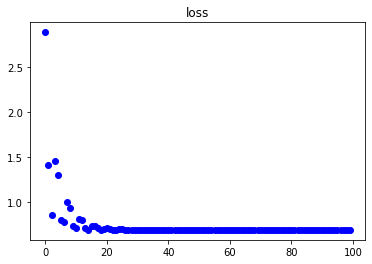

In [155]:
p = np.arange(100)
plt.scatter(p, y, c='b', label='loss_data')
#plt.legend()
plt.title('loss')
plt.show()

In [156]:
A1 = np.dot(x,W1) +B1
Z1 = relu(A1)#一層目活性化関数かける


A2 = np.dot(Z1,W2)+B2
Z22 = sigmoid(A2)

delta = Z2 - target#誤差
#print(delta)
print(Z2)

[[0.49742424]
 [0.51122994]
 [0.48762494]
 [0.50143001]]
